# Sistema de tres grados de libertad

Resuelve el sistema de la [figura](variablesDefinition.png), haciendo uso de [SymPy](https://www.sympy.org), una biblioteca en [Python](https://www.python.org) para mostrar el potencial del uso de herramientas computacionales en este tipo de problemas. 

![figura](variablesDefinition.png "sistema de tres grado de libertad")


In [358]:
# definicion de modulos a utilizar
from sympy import *
from sympy.physics.mechanics import *
init_printing()

## Definición de variables

In [354]:
# simbolic variables definition
q1, q2, q3    = dynamicsymbols('q_1 q_2 q_3')              # coordenadas generalizadas
qt1, qt2, qt3 = dynamicsymbols('q_1 q_2 q_3', 1)           # 1ra derivadas coordenadas generalizadas
m1, m2, m3    = symbols('m_1 m_2 m_3', real = True)        # masas puntuales
k1, k2, k3    = symbols('k_1 k_2 k_3', real = True)        # constantes elásticas

# define generalized coordinates as a python list
q = [q1,q2,q3]

# real variables definition as a python dictionary
setupValues = {k1:50, k2:50, k3:50, m1:1, m2:1, m3:1}

## Lagrangiano

Cálculo de la energía cinética ($T$) y potencial ($V$) en términos de las coordenadas generalizadas ($q_{i}$) y sus velocidades ($\dot{q}_i$). Luego el Lagrangiano del sistema resulta
$$ \mathcal{L} = T - V $$

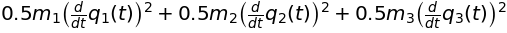

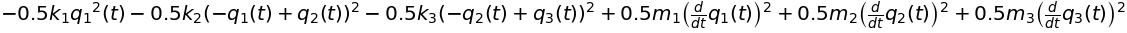

In [362]:
T = 1/2*m1*qt1**2 + 1/2*m2*qt2**2 + 1/2*m3*qt3**2           # energía cinética
V = 1/2*k1*q1**2 + 1/2*k2*(q2-q1)**2 + 1/2*k3*(q3-q2)**2    # energía potencial
L = T - V                                                   # lagrangiano

display(T,V,L)

## Ecuaciones de movimiento - EOM (equation of motion)
Luego las ecuaciones de movimiento podemos obtenerlas según
$$\frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot{q}_{i}} - \frac{\partial \mathcal{L}}{\partial q_{i}} = 0 \qquad \forall i =1,2,3 $$ 

### Mediante el uso de algebra simbólica de SymPy

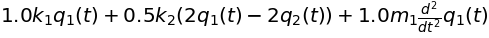

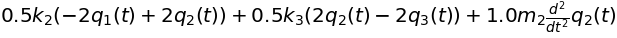

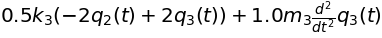

In [118]:
# compute motion equations
eq1 = diff(diff(L, qt1), 't') - diff(L, q1)
eq2 = diff(diff(L, qt2), 't') - diff(L, q2)
eq3 = diff(diff(L, qt3), 't') - diff(L, q3)

# simplify eqs  
simplify(eq1);simplify(eq2);simplify(eq3)

# show them
display(eq1,eq2,eq3)

### Mediante el uso del módulo *physics/mechanics* de SymPy
Aquí seguimos las intrucciones de [*sympy - mechanics/physics package*](https://docs.sympy.org/latest/modules/physics/mechanics/lagrange.html)

In [395]:
# 1ro, creamos el objeto lagrangeano 
LM = LagrangesMethod(L,[q1,q2,q3])

# 2do, con el objeto LM, podemos generar las ecuaciones de movimiento.
mechanics_printing(pretty_print=True)
LM.form_lagranges_equations()     # coinciden con las anteriores, calculadas "manualmente"
EOM = LM.eom
display(simplify(EOM))

⎡    1.0⋅k₁⋅q₁ + k₂⋅(q₁ - q₂) + 1.0⋅m₁⋅q₁̈    ⎤
⎢                                             ⎥
⎢-1.0⋅k₂⋅(q₁ - q₂) + k₃⋅(q₂ - q₃) + 1.0⋅m₂⋅q₂̈⎥
⎢                                             ⎥
⎣       -1.0⋅k₃⋅(q₂ - q₃) + 1.0⋅m₃⋅q₃̈        ⎦

## Cálculo de autovalores y autovectores

El ecuaciones de movimiento (EOMs) pueden ser escritas en forma matricial con el siguiente formato:

$$\mathrm{M} ~ \ddot{q} + \mathrm{K} ~ q = 0 $$
siendo $\mathrm{M}$ y $\mathrm{K}$ las matrices de masas y rigidez del sistema.

El cálculo de modos normales surge naturalmente introduciendo en el sistema de ecuaciones, soluciones de la forma:

$$q_{i} = q_{i0} cos(\omega t + \phi_{io})$$
siendo $q_{i0}$, $\omega$  y $\phi_{i0}$, la amplitud, la velocidad angular y fase inicial del movimiento, respectivamente.

El sistema resultante es de la forma:

$$( \mathrm{K} - \omega^{2} \mathrm{M} ) ~ q_{0} ~ cos(\omega t) = 0$$
siendo $q_{0}$ un vector cuyas componenetes son las amplitudes $q_{io}$.

Para que el sistema tenga solución distinta a la trivial ($q_{i0} = 0 ~ \forall i$), se requiere que el sistema no sea invertible, es decir que su determinante sea nulo:

$$ \text{det}( \mathrm{K} - \omega^{2} \mathrm{M} ) = 0 $$

### Matriz de Masas $\mathbf{M}$

In [401]:
M = LM.mass_matrix
display(M)
display(M.subs(setupValues))

⎡1.0⋅m₁    0       0   ⎤
⎢                      ⎥
⎢  0     1.0⋅m₂    0   ⎥
⎢                      ⎥
⎣  0       0     1.0⋅m₃⎦

⎡1.0   0    0 ⎤
⎢             ⎥
⎢ 0   1.0   0 ⎥
⎢             ⎥
⎣ 0    0   1.0⎦

### Matriz de Rígidez $\mathbf{K}$

In [402]:
K = -LM.forcing.jacobian(q)  # el signo - se corresponde por definicion de SymPy, usa F = ma, F = Kx
display(K)
display(K.subs(setupValues))

⎡1.0⋅k₁ + 1.0⋅k₂      -1.0⋅k₂         0   ⎤
⎢                                         ⎥
⎢    -1.0⋅k₂      1.0⋅k₂ + 1.0⋅k₃  -1.0⋅k₃⎥
⎢                                         ⎥
⎣       0             -1.0⋅k₃      1.0⋅k₃ ⎦

⎡100.0  -50.0    0  ⎤
⎢                   ⎥
⎢-50.0  100.0  -50.0⎥
⎢                   ⎥
⎣  0    -50.0  50.0 ⎦

In [394]:
Kp = K.subs(setupValues); display(Kp)
eigenValues = simplify(Kp.eigenvals())
eigenValues.keys()
for key in eigenValues.keys():
    print(key)

re(-250/3 - 50*(7/2 + 21*sqrt(3)*I/2)**(1/3)/3 - 350/(3*(7/2 + 21*sqrt(3)*I/2)**(1/3)))

⎡-100.0   50.0     0  ⎤
⎢                     ⎥
⎢ 50.0   -100.0  50.0 ⎥
⎢                     ⎥
⎣  0      50.0   -50.0⎦

-250/3 - 50*(7/2 + 21*sqrt(3)*I/2)**(1/3)/3 - 350/(3*(7/2 + 21*sqrt(3)*I/2)**(1/3))
-250/3 - 50*(-1/2 + sqrt(3)*I/2)*(7/2 + 21*sqrt(3)*I/2)**(1/3)/3 - 350/(3*(-1/2 + sqrt(3)*I/2)*(7/2 + 21*sqrt(3)*I/2)**(1/3))
-250/3 - 350/(3*(-1/2 - sqrt(3)*I/2)*(7/2 + 21*sqrt(3)*I/2)**(1/3)) - 50*(-1/2 - sqrt(3)*I/2)*(7/2 + 21*sqrt(3)*I/2)**(1/3)/3


In [370]:
# cálculo autovalores
q10 = symbols('q_{10}', real = True)
q20 = symbols('q_{20}', real = True)
q30 = symbols('q_{30}', real = True)
w   = symbols('\omega', real = True)
phi = symbols('\phi'  , real = True)

# reemplaza la solución propuesta
EOMs = EOM.subs({q1:q10*cos(w*t+phi), q2:q20*cos(w*t+phi), q3:q30*cos(w*t+phi)})
display(simplify(EOMs))

⎡                                                                             
⎢                                                                             
⎢      1.0⋅k₁⋅q_{10}⋅cos(\omega⋅t + \phi) + k₂⋅(q_{10} - q_{20})⋅cos(\omega⋅t 
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢-1.0⋅k₂⋅(q_{10} - q_{20})⋅cos(\omega⋅t + \phi) + k₃⋅(q_{20} - q_{30})⋅cos(\om
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

⎡            2                                                                
⎢- 1.0⋅\omega ⋅m₁ + 1.0⋅k₁ + 1.0⋅k₂               -1.0⋅k₂                     
⎢                                                                             
⎢                                                2                            
⎢             -1.0⋅k₂                - 1.0⋅\omega ⋅m₂ + 1.0⋅k₂ + 1.0⋅k₃       
⎢                                                                             
⎢                                                                             
⎣                0                                -1.0⋅k₃                - 1.0

                    ⎤
       0            ⎥
                    ⎥
                    ⎥
    -1.0⋅k₃         ⎥
                    ⎥
       2            ⎥
⋅\omega ⋅m₃ + 1.0⋅k₃⎦

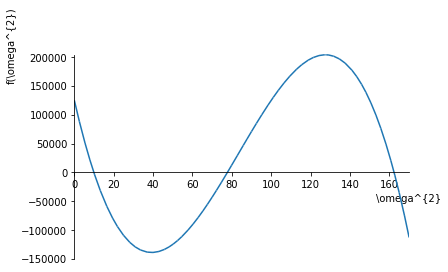

omega_1 = 3.14692122712948
omega_2 = 8.81747733789935
omega_3 = 12.7416239226353


In [353]:
M = LM.mass_matrix
K = LM.forcing.jacobian([q1, q2, q3])

charMatrix = -K-M*w**2
display(charMatrix)
charPoly = charMatrix.det()
#display(charPoly)

# para usar w^2 como variable independiente
w2 = symbols('\omega^{2}')
charPoly2 = charPoly.subs(w**2,w2)

# set variable values
setupValues = {k1:50, k2:50, k3:50, m1:1, m2:1, m3:1}

# replace simbolic variables with real values
charPoly3 = charPoly2.subs(setupValues) 

# plot characteristic polynomial
p1 = plotting.plot(charPoly3,(w2,0,170),show=False)
p1.show()

# find roots
roots = solve(charPoly3, w2)        # note we are solving for w^2, so w = +sqrt(w^2)
for i in range(len(roots)):
    wi = sqrt(re(roots[i]))         # compute square root
    myString = "omega_{} = {}"      
    print(myString.format(i+1,wi))  # print i-th root


## Polinomio caracteristico

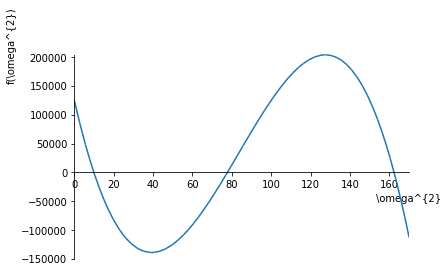

In [371]:
# obtiene polinomio caracteristico calculando el determinante de (K-M*w2)
charPoly = charMatrix.det()

# para usar w^2 como variable independiente
w2 = symbols('\omega^{2}')
charPoly2 = charPoly.subs(w**2,w2)

# replace simbolic variables with real values
charPoly3 = charPoly2.subs(setupValues)

# show poly
display(charPoly3)

# plot poly
p1 = plotting.plot(charPoly3,(w2,0,170),show=False)
p1.show()

## Autovalores

Los autovales pueden ser calculados como las raices del polinomio característico.

In [355]:
# find roots
roots = solve(charPoly3, w2)        # note we are solving for w^2, so w = +sqrt(w^2)
for i in range(len(roots)):
    wi = sqrt(re(roots[i]))         # compute square root
    myString = "omega_{} = {}"      
    print(myString.format(i+1,wi))  # print i-th root

omega_1 = 3.14692122712948
omega_2 = 8.81747733789935
omega_3 = 12.7416239226353


In [372]:


q10 = symbols('q_{10}', real = True)
a = simplify(eqm[0].subs(q1,q10*cos(w*t)))

In [166]:
f = Matrix([m1*q1+m2*q2,(m1+m2)*q1])
q = Matrix([q1, q2])
display(f)
f.jacobian(q)

⎡m₁⋅q₁ + m₂⋅q₂⎤
⎢             ⎥
⎣(m₁ + m₂)⋅q₁ ⎦

⎡  m₁     m₂⎤
⎢           ⎥
⎣m₁ + m₂  0 ⎦

In [205]:
w = symbols('w', real = True)
eqm = LM.eom
test = eqm[0].subs(q1,cos(w*t))
display(simplify(test))

                                                    2          
                                                   ∂           
1.0⋅k₁⋅cos(t⋅w) - 1.0⋅k₂⋅(q₂ - cos(t⋅w)) + 1.0⋅m₁⋅───(cos(t⋅w))
                                                    2          
                                                  ∂t           

In [232]:
poly = 3 + 1*q1 + 2*Derivative(qt1)
poly2= poly.subs(q1,cos(w*t))
display(expand(poly,poly2))

In [130]:
print(LM.__doc__)

Lagrange's method object.

    This object generates the equations of motion in a two step procedure. The
    first step involves the initialization of LagrangesMethod by supplying the
    Lagrangian and the generalized coordinates, at the bare minimum. If there
    are any constraint equations, they can be supplied as keyword arguments.
    The Lagrange multipliers are automatically generated and are equal in
    number to the constraint equations. Similarly any non-conservative forces
    can be supplied in an iterable (as described below and also shown in the
    example) along with a ReferenceFrame. This is also discussed further in the
    __init__ method.

    Attributes

    q, u : Matrix
        Matrices of the generalized coordinates and speeds
    forcelist : iterable
        Iterable of (Point, vector) or (ReferenceFrame, vector) tuples
        describing the forces on the system.
    bodies : iterable
        Iterable containing the rigid bodies and particles of the system.

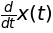

In [84]:
x  = dynamicsymbols('x')
xt = dynamicsymbols('x',1)
display(xt)

In [88]:
T = 0.5*xt**2
V = x
L = T - V

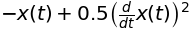

In [89]:
display(L)

In [90]:
f = diff(diff(L, xt), 't') - diff(L, x)

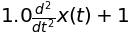

In [91]:
display(f)